In [1]:
import pickle
import sys
import csv
import random
sys.path.append(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project')
from execute_remote_scripts import *
# from Processing_Data.downsampling import *
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde
%load_ext autoreload
%autoreload 2
# from Server_Scripts.remote_processing_csv import *
from Processing_Data.EDA import *

# Enable LaTeX rendering
plt.rcParams.update({
    "text.usetex": False, 
    "font.family": "serif"
})

C:\Users\Max Tost\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [6]:
# Loading Shot numbers
base_path = r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\CSV_test'
files = os.listdir(base_path)
# Loading all csv files into a diciotnary
dataframes = {}
for file in files:
    dataframes[int(file.split('.')[0].split('no')[1])] = pd.read_csv(os.path.join(base_path, file))
    
RE_autom = list(pd.read_csv(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\automatic_RE_numbers.csv', header=None)[0])
RE_valid = list(pd.read_csv(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\validated_RE_numbers.csv', header=None)[0])

# Checking for NaNs and Infs and dropping them if necessary
check_nans_infs(dataframes, drop=True)

# Updating the shot lists
RE_autom = [shot for shot in RE_autom if shot in dataframes.keys()]
RE_valid = [shot for shot in RE_valid if shot in dataframes.keys()]
NO_RE_probably = [key for key in dataframes.keys() if key not in RE_autom and key not in RE_valid]

# Extracting the keys of the variables
features = list(dataframes[NO_RE_probably[0]].keys()) #to_numpy()
features.pop(features.index('time'))
features

DataFrame 84162: NaNs = 832, Infs = 0
DataFrame 86646: NaNs = 232, Infs = 0
DataFrame 95732: NaNs = 1408, Infs = 0
DataFrame 95768: NaNs = 1791, Infs = 0
DataFrame 98150: NaNs = 20, Infs = 0
DataFrame 98169: NaNs = 700, Infs = 0
DataFrame 98176: NaNs = 2719, Infs = 0
DataFrame 99034: NaNs = 272, Infs = 0
Dropped DataFrames: [84162, 86646, 95732, 95768, 98150, 98169, 98176, 99034]


['SSXcore', 'IPLA', 'DAO_EDG7', 'WMHD', 'RNT', 'DAI_EDG7']

In [9]:
random.seed(42) # So that we always work with the same ones.
random_50_re = random.sample(RE_autom, 5)  # Ensures no duplicates

In [ ]:
# #In case we need to recreate the dictionary
# RE_lifetimes = {}

# np.savez(r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Processing_Data\RE_lifetime.npz", **RE_lifetimes)


In [29]:
# Shot that is currently processed
k = 5
shot_nr = random_50_re[k]

# Load the file and plot it
base_path_re = r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\CSV_test'
file_path = os.path.join(base_path_re, 'JETno' + str(shot_nr)+'.csv')
data = pd.read_csv(file_path)
plt.close()

# Find the first index where time is greater than the starting time + 1
first_index = np.argmax(data['time'] > data['time'][0] + 1)  

# Plot vertical line at this point
plt.vlines(data['time'][first_index], ymin=0, ymax=-data['IPLA'].min()*1.1, color='r', linestyle='dashed', label='Disruption')

plt.plot(data['time'], -data['IPLA'])

# Show the plot
plt.legend()
plt.xlim(data['time'][first_index]-0.5, data['time'][first_index]+0.5)
plt.show()

IndexError: list index out of range

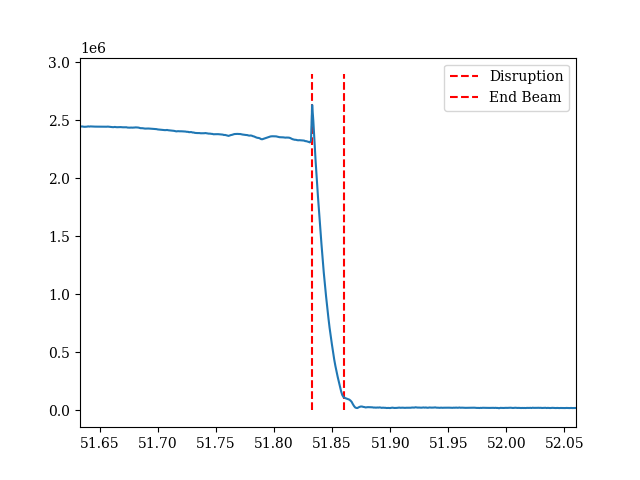

In [28]:
# Set time that is to be written as end of the beam time
end_beam = 51.86

# Load the dictionary
RE_lifetimes = np.load(r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Processing_Data\RE_lifetime.npz")
RE_lifetimes = {key: RE_lifetimes[key] for key in RE_lifetimes.files}
# Set the new value and save
RE_lifetimes[f'{shot_nr}'] = (data['time'][first_index], end_beam)
np.savez(r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Processing_Data\RE_lifetime.npz", **RE_lifetimes)

# Plot to verify
plt.close()
plt.vlines(data['time'][first_index], ymin=0, ymax=-data['IPLA'].min()*1.1, color='r', linestyle='dashed', label='Disruption')
plt.vlines(end_beam, ymin=0, ymax=-data['IPLA'].min()*1.1, color='r', linestyle='dashed', label='End Beam')
plt.plot(data['time'], -data['IPLA'])

# Show the plot
plt.legend()
plt.xlim(data['time'][first_index]-0.2, end_beam+0.2)
plt.show()

In [30]:
RE_lifetimes

{'91076': array([60.0238, 60.11  ]),
 '98088': array([56.5092, 56.53  ]),
 '97085': array([53.8901, 53.91  ]),
 '98173': array([56.07429912, 56.09      ]),
 '97081': (51.8327, 51.86)}

## Creating targets from beam durations